In [ ]:
import pandas as pd
import numpy as np

try:
    from thefuzz import process, fuzz
except ImportError:
    !pip install thefuzz[speedup]
    from thefuzz import process, fuzz


# Load the datasets
# dataset1: Contains a column 'Funds' with mutual fund names
df1 = pd.read_csv('Mutual Fund Dataset 2025.csv')

# dataset2: Contains 'scheme names' and 'scheme codes'
df2 = pd.read_csv('Indian_growth_direct_mfs_mapping_id_to_name.csv')

# Create a new column in df1 to store the matched scheme code
df1['Scheme Code'] = None

# Prepare a list of scheme names from df2 for fuzzy matching
scheme_names_list = df2['Scheme Name'].tolist()

# Set a threshold for a "good" match; adjust if needed
threshold = 80

# Iterate over each mutual fund in df1
for idx, row in df1.iterrows():
    fund_name = row['Funds']

    # Use fuzzy matching to find the best matching scheme name
    result = process.extractOne(fund_name, scheme_names_list, scorer=fuzz.token_set_ratio)

    if result is None:
        df1.at[idx, 'Scheme Code'] = None
        continue

    # Check if the result has an index (length 3) or not (length 2)
    if len(result) == 3:
        best_match, score, match_index = result
    else:
        best_match, score = result
        match_index = scheme_names_list.index(best_match)

    if score >= threshold:
        scheme_code = df2.iloc[match_index]['Scheme Code']
        df1.at[idx, 'Scheme Code'] = scheme_code
    else:
        df1.at[idx, 'Scheme Code'] = None

# Display the updated DataFrame
df1.head()
df1=df1.dropna(subset=['Scheme Code'])
df1['Scheme Code']=df1['Scheme Code'].astype(int)
df1

<ipython-input-2-7a0a3746464d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Scheme Code']=df1['Scheme Code'].astype(int)


,Funds,Fund Manager,Category,RupeeVestRating,AUM(in Rs. cr),ExpenseRatio (%),Fund Type,Inception Date,Benchmark Index,NAV,...,Mod. Duration(in yrs),Yield To Maturity (%),Alpha,Sharpe,Sortino,Beta,Standard Deviation,classification,Exit_load_Remarks,Scheme Code
7,Aditya Birla SL Active Debt Multi-Mgr FoF(G),Kaustubh Gupta,FOF-DOM,Unrated,10.3,0.54,Open Ended,28-Dec-06,CRISIL Composite Bond Index,35.85,...,-,-,2.6,2.17,3.78,0.4,1.74,FoFs : Domestic,0.25% on or before 15D Nil after 15D,131898
8,Aditya Birla SL Arbitrage Fund(G),Lovelish Solanki,HY-ARB,3,13843.7,1.01,Open Ended,24-Jul-09,Nifty 50 Arbitrage - TRI,25.69,...,0.66,7.5,3.53,3.35,7.38,-0.08,0.99,Hybrid : Arbitrage,0.25% on or before 15D Nil after 15D,119526
9,Aditya Birla SL Asset Allocator FoF(G),Vinod Narayan Bhat,FOF-DOM,Unrated,187.4,1.25,Open Ended,17-Aug-06,CRISIL Hybrid 50+50 - Moderate Index,63.05,...,-,-,7.41,1.1,1.54,1.81,11.67,FoFs : Domestic,1% on or before 365D Nil after 365D,131865
11,Aditya Birla SL Balanced Advantage Fund(G),Harish krishnan,HY-DYN,4,7400.2,1.8,Open Ended,25-Apr-00,CRISIL Hybrid 50+50 - Moderate Index,100.81,...,2.87,7.41,5.17,1.12,1.66,1.23,7.84,Hybrid : Dynamic Asset Allocation,0.25% on or before 7D Nil after 7D,131670
12,Aditya Birla SL Banking & Financial Services F...,Dhaval Gala,EQ-FIN,4,3269.7,1.99,Open Ended,14-Dec-13,Nifty Financial Services - TRI,56.09,...,-,-,1.23,0.39,0.56,1.03,16.42,Equity : Sectoral - Financial Services,1% on or before 30D Nil after 30D,125597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,UTI Value Fund-Reg(G),Amit Premchandani,EQ-VAL,3,10159.1,1.82,Open Ended,20-Jul-05,NIFTY 500 - TRI,165.82,...,-,-,13.78,1.33,2.01,0.91,13.83,Equity : Value / Contra,Nil upto 10% of units and 1% for remaining uni...,120699
1776,WOC Balanced Advantage Fund-Reg(G),Ramesh Mantri,HY-DYN,Unrated,1272.6,2.11,Open Ended,10-Feb-23,CRISIL Hybrid 50+50 - Moderate Index,13.89,...,2.92,7.33,7.89,1.52,2.26,1.55,8.17,Hybrid : Dynamic Asset Allocation,1% on or before 1M Nil after 1M,118615
1778,WOC Banking & Financial Services Fund-Reg(G),Trupti Agrawal,EQ-FIN,Unrated,301.9,2.39,Open Ended,06-Feb-24,Nifty Financial Services - TRI,11.67,...,-,-,-,-,-,-,-,Equity : Sectoral - Financial Services,1% on or before 1M Nil after 1M,118868
1787,WOC Multi Asset Allocation Fund-Reg(G),Ramesh Mantri,HY-MULTI,Unrated,1053.4,1.91,Open Ended,19-May-23,CRISIL Short Term Bond Index,13.01,...,2.13,7.18,10.68,2.41,3.77,0.84,5.46,Hybrid : Multi Asset Allocation,1% on or before 1M Nil after 1M,118624


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AUM(in Rs. cr)'].plot(kind='hist', bins=20, title='AUM(in Rs. cr)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ExpenseRatio (%)'].plot(kind='hist', bins=20, title='ExpenseRatio (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Return (%)1 mo'].plot(kind='hist', bins=20, title='Return (%)1 mo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('RupeeVestRating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Fund Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='AUM(in Rs. cr)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AUM(in Rs. cr)', y='ExpenseRatio (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='ExpenseRatio (%)', y='Return (%)1 mo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Return (%)1 mo', y='Return (%)3 mo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AUM(in Rs. cr)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RupeeVestRating')):
  _plot_series(series, series_name, i)
  fig.legend(title='RupeeVestRating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AUM(in Rs. cr)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AUM(in Rs. cr)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fund Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fund Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AUM(in Rs. cr)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ExpenseRatio (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('RupeeVestRating')):
  _plot_series(series, series_name, i)
  fig.legend(title='RupeeVestRating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ExpenseRatio (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ExpenseRatio (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fund Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fund Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ExpenseRatio (%)')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['AUM(in Rs. cr)'].plot(kind='line', figsize=(8, 4), title='AUM(in Rs. cr)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['ExpenseRatio (%)'].plot(kind='line', figsize=(8, 4), title='ExpenseRatio (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Return (%)1 mo'].plot(kind='line', figsize=(8, 4), title='Return (%)1 mo')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fund Type'].value_counts()
    for x_label, grp in _df_18.groupby('RupeeVestRating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RupeeVestRating')
_ = plt.ylabel('Fund Type')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['RupeeVestRating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='RupeeVestRating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Fund Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='Fund Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['RupeeVestRating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='AUM(in Rs. cr)', y='RupeeVestRating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Fund Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='AUM(in Rs. cr)', y='Fund Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

(392, 57)
<class 'numpy.ndarray'>
0


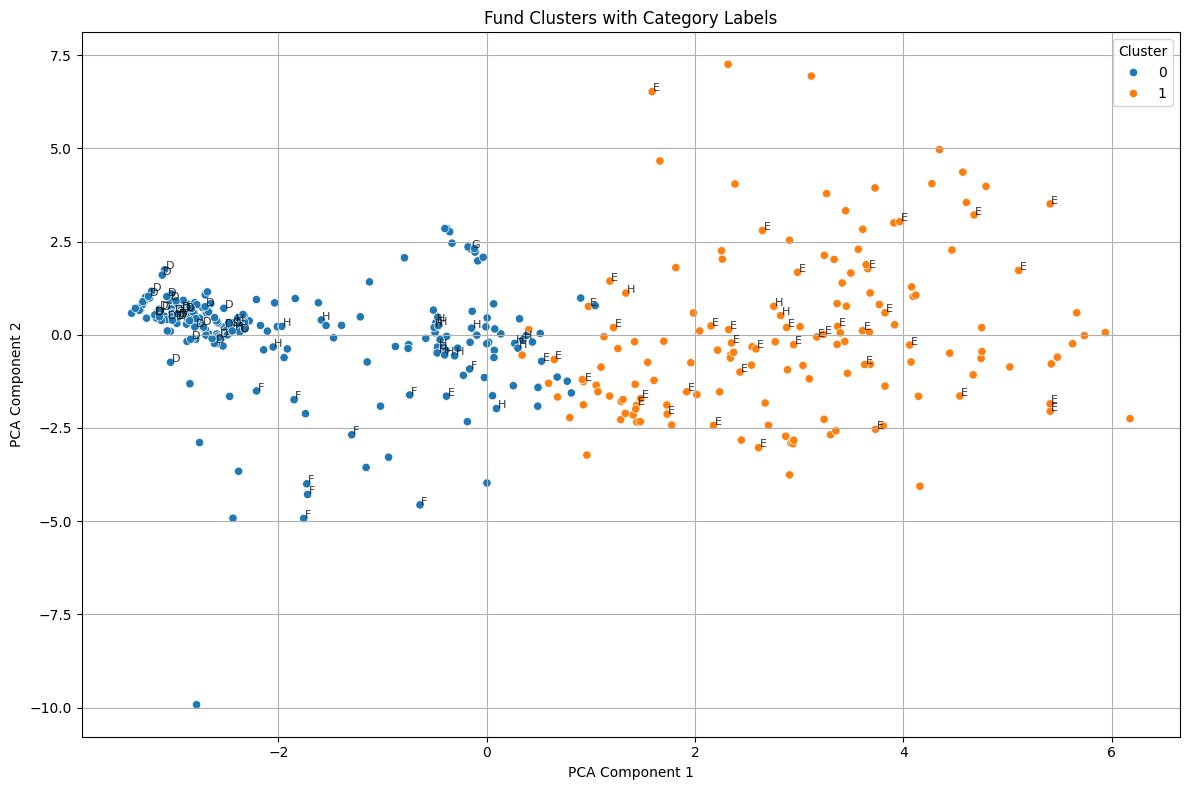

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace missing return values ('-') with NaN and convert to float
return_cols = [col for col in df1.columns if 'Return (%)' in col]
df1[return_cols] = df1[return_cols].replace('-', np.nan).astype(float)

# Fill or drop missing values — here we fill with median
df1[return_cols] = df1[return_cols].fillna(df1[return_cols].median())

# Convert AUM and Expense Ratio to float (remove commas or other symbols if needed)
# Replace '-' with NaN first
df1['AUM(in Rs. cr)'] = df1['AUM(in Rs. cr)'].replace('-', np.nan)
# Remove commas if any, convert to float
df1['AUM(in Rs. cr)'] = df1['AUM(in Rs. cr)'].astype(str).str.replace(',', '', regex=False).astype(float)
# Fill NaNs with median
df1['AUM(in Rs. cr)'] = df1['AUM(in Rs. cr)'].fillna(df1['AUM(in Rs. cr)'].median())

df1['ExpenseRatio (%)'] = df1['ExpenseRatio (%)'].replace('-', np.nan).astype(float)
df1['ExpenseRatio (%)'] = df1['ExpenseRatio (%)'].fillna(df1['ExpenseRatio (%)'].median())

# Select numerical features
numerical_cols = ['AUM(in Rs. cr)', 'ExpenseRatio (%)'] + return_cols
X_num = df1[numerical_cols].values

# --- NLP-style Category Encoding ---
# Clean and use TF-IDF on the 'Category' column
df1['Category'] = df1['Category'].astype(str)
vectorizer = TfidfVectorizer()
X_cat = vectorizer.fit_transform(df1['Category']).toarray()
cat_feature_names = vectorizer.get_feature_names_out()

# Combine numerical + category features
X_combined = np.hstack([X_num, X_cat])
print(X_combined.shape)
print(type(X_combined))
print(np.isnan(X_combined).sum())  # Should be 0

# Scale the combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# --- Clustering ---
k = 2  # Try different values of k and use the elbow method if needed
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df1['Cluster'] = clusters

# --- Visualization using PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
palette = sns.color_palette('tab10', n_colors=k)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['Cluster'], palette=palette)

# Add text labels for each point with its Category
for i, (x, y) in enumerate(zip(X_pca[:, 0], X_pca[:, 1])):
  if i%4==0:
    plt.text(x + 0.01, y + 0.01, df1['Category'].iloc[i][0], fontsize=8, alpha=0.8)

plt.title('Fund Clusters with Category Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


# cluster_summary = df1.groupby('Cluster')['Category'].value_counts()
# print(cluster_summary)

# # Optional: View cluster composition
# df1['PCA1'] = X_pca[:, 0]
# df1['PCA2'] = X_pca[:, 1]
# # View the coordinates with Category and Cluster
# coords_df = df1[['Funds', 'Category', 'Cluster', 'PCA1', 'PCA2']]
# coords_df


📊 Cluster-wise Risk Summary:
   Cluster  Avg Return (%)  Avg Volatility (%)     Risk Level
0        0            7.71                2.80       Low Risk
1        1           26.07               14.75      High Risk
2        2           14.63                8.13  Moderate Risk


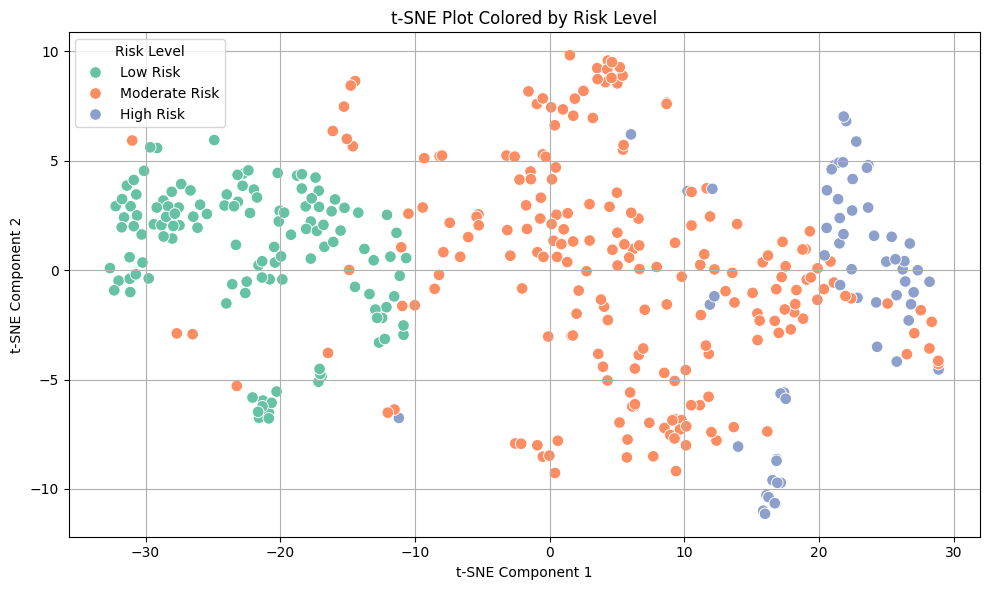

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only return columns
return_cols = [col for col in df1.columns if 'Return (%)' in col]
X_returns = df1[return_cols].replace('-', np.nan).astype(float)

# Step 2: Fill missing values with median
X_returns = X_returns.fillna(X_returns.median())

# Step 3: Scale the return features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_returns)

# Step 4: Apply Gaussian Mixture Model
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
df1['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Step 5: Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
df1['tSNE-1'] = X_tsne[:, 0]
df1['tSNE-2'] = X_tsne[:, 1]

# # Step 6: Plot t-SNE clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df1, x='tSNE-1', y='tSNE-2', hue='GMM_Cluster', palette='tab10', s=70)
# plt.title('GMM Clusters Based on Historical Returns (t-SNE)')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(title='Cluster')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Step 7: Print fund names in each cluster
# print("\n🔍 Funds in each GMM Cluster:")
# for cluster_id in sorted(df1['GMM_Cluster'].unique()):
#     cluster_funds = df1[df1['GMM_Cluster'] == cluster_id]['Funds']
#     print(f"\nCluster {cluster_id} ({len(cluster_funds)} funds):")
#     print(cluster_funds.to_string(index=False))


# Step 8: Calculate average return and volatility for each cluster
cluster_summary = []

for cluster_id in sorted(df1['GMM_Cluster'].unique()):

    cluster_funds = df1[df1['GMM_Cluster'] == cluster_id]
    # avg_return = cluster_funds['Return (%)6 mo'].replace('-', np.nan).astype(float).mean()   # Mean of fund-wise average returns
    avg_return = cluster_funds['Return (%)1 yr'].replace('-', np.nan).astype(float).mean()
    cluster_data = X_returns[df1['GMM_Cluster'] == cluster_id]
    volatility = cluster_data.std(axis=1).mean()    # Mean of fund-wise std deviation

    cluster_summary.append({
        'Cluster': cluster_id,
        'Avg Return (%)': round(avg_return, 2),
        'Avg Volatility (%)': round(volatility, 2)
    })

# Convert to DataFrame
cluster_df = pd.DataFrame(cluster_summary)

# Step 9: Assign risk levels based on volatility thresholds (tweak as needed)
def assign_risk_tag(volatility):
    if volatility < 5:
        return 'Low Risk'
    elif volatility < 10:
        return 'Moderate Risk'
    else:
        return 'High Risk'

cluster_df['Risk Level'] = cluster_df['Avg Volatility (%)'].apply(assign_risk_tag)

# Display the cluster-wise summary
print("\n📊 Cluster-wise Risk Summary:")
print(cluster_df)

# Map cluster ID to risk tag
risk_map = dict(zip(cluster_df['Cluster'], cluster_df['Risk Level']))
df1['Risk Level'] = df1['GMM_Cluster'].map(risk_map)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='tSNE-1', y='tSNE-2', hue='Risk Level', palette='Set2', s=70)
plt.title('t-SNE Plot Colored by Risk Level')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Risk Level')
plt.grid(True)
plt.tight_layout()
plt.show()


#Selecting a particular risk type

In [ ]:
# Example user input
user_risk_preference = "Moderate Risk"

# Filter the dataframe for funds in the selected risk level
filtered_funds_df = df1[df1['Risk Level'] == user_risk_preference]

# Show the filtered results
print(f"\n🎯 Funds matching '{user_risk_preference}': {len(filtered_funds_df)} funds found.\n")
filtered_funds_df
# print(filtered_funds_df[['Funds', 'GMM_Cluster', 'Risk Level']].to_string(index=False))



🎯 Funds matching 'Moderate Risk': 206 funds found.



,Funds,Fund Manager,Category,RupeeVestRating,AUM(in Rs. cr),ExpenseRatio (%),Fund Type,Inception Date,Benchmark Index,NAV,...,Beta,Standard Deviation,classification,Exit_load_Remarks,Scheme Code,Cluster,GMM_Cluster,tSNE-1,tSNE-2,Risk Level
9,Aditya Birla SL Asset Allocator FoF(G),Vinod Narayan Bhat,FOF-DOM,Unrated,187.4,1.25,Open Ended,17-Aug-06,CRISIL Hybrid 50+50 - Moderate Index,63.05,...,1.81,11.67,FoFs : Domestic,1% on or before 365D Nil after 365D,131865,0,2,9.302419,1.253717,Moderate Risk
11,Aditya Birla SL Balanced Advantage Fund(G),Harish krishnan,HY-DYN,4,7400.2,1.80,Open Ended,25-Apr-00,CRISIL Hybrid 50+50 - Moderate Index,100.81,...,1.23,7.84,Hybrid : Dynamic Asset Allocation,0.25% on or before 7D Nil after 7D,131670,0,2,5.038070,0.214523,Moderate Risk
12,Aditya Birla SL Banking & Financial Services F...,Dhaval Gala,EQ-FIN,4,3269.7,1.99,Open Ended,14-Dec-13,Nifty Financial Services - TRI,56.09,...,1.03,16.42,Equity : Sectoral - Financial Services,1% on or before 30D Nil after 30D,125597,1,2,10.118993,-8.005812,Moderate Risk
38,Aditya Birla SL Dividend Yield Fund(G),Dhaval Gala,EQ-DIV,Unrated,1536.5,2.21,Open Ended,10-Feb-03,NIFTY 500 - TRI,452.51,...,0.98,16.7,Equity : Thematic - Dividend Yield,1% on or before 90D Nil after 90D,119507,1,2,17.898186,-2.709370,Moderate Risk
39,Aditya Birla SL Dynamic Bond Fund-Reg(G),Mohit Sharma,DT-DYN,1,1716.9,1.23,Open Ended,27-Sep-04,NIFTY Composite Debt Index,44.23,...,1.13,2.11,Debt : Dynamic Bond,Nil upto 15% of units0.50% in excess of limit ...,119505,0,2,-14.612080,5.667493,Moderate Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,UTI Retirement Fund,V. Srivatsa,HY-SOL,2,4646.5,1.66,Open Ended,27-Dec-94,CRISIL Short Term Debt Hybrid 60+40 Index,48.36,...,1.31,5.92,Hybrid : Solution Oriented,1% upto 1Y Nil on or after 1Y,119251,0,2,4.442679,2.899452,Moderate Risk
1773,UTI Value Fund-Reg(G),Amit Premchandani,EQ-VAL,3,10159.1,1.82,Open Ended,20-Jul-05,NIFTY 500 - TRI,165.82,...,0.91,13.83,Equity : Value / Contra,Nil upto 10% of units and 1% for remaining uni...,120699,1,2,16.708971,-2.320065,Moderate Risk
1776,WOC Balanced Advantage Fund-Reg(G),Ramesh Mantri,HY-DYN,Unrated,1272.6,2.11,Open Ended,10-Feb-23,CRISIL Hybrid 50+50 - Moderate Index,13.89,...,1.55,8.17,Hybrid : Dynamic Asset Allocation,1% on or before 1M Nil after 1M,118615,0,2,1.752429,7.061282,Moderate Risk
1778,WOC Banking & Financial Services Fund-Reg(G),Trupti Agrawal,EQ-FIN,Unrated,301.9,2.39,Open Ended,06-Feb-24,Nifty Financial Services - TRI,11.67,...,-,-,Equity : Sectoral - Financial Services,1% on or before 1M Nil after 1M,118868,1,2,-0.295980,5.184175,Moderate Risk


In [ ]:
filtered_df = filtered_funds_df
selected_schema_codes = filtered_df['Scheme Code'].tolist()
print(len(selected_schema_codes))

206


# Importing and Cleaning correlation dataset

In [ ]:
# The CSV is assumed to have schema codes as both row index and column headers.
file_name = "Growth_Direct_MF_Corr.csv"
df_corr = pd.read_csv(file_name, index_col=0)

# Ensure the index and columns are strings (schema codes)
df_corr.index = df_corr.index.astype(int)
df_corr.columns = df_corr.columns.astype(int)
print(df_corr.shape[0], df_corr.shape[1])
print(df_corr.index.dtype)  # Check the index type
print(selected_schema_codes[0])  # Check the type of elements in selected_schema_codes

# Filter the matrix for schema codes (both rows and columns) acc to selected_schema_codes
# Find schema codes that exist in df_corr
valid_schema_codes = list(set(selected_schema_codes) & set(df_corr.index))

# Now filter using only valid schema codes
filtered_corr = df_corr.loc[valid_schema_codes, valid_schema_codes]
print(filtered_corr.shape)
corr_matrix = filtered_corr.to_numpy()  # Convert to numpy array for faster operations.

# Number of funds available after filtering
filtered_corr

1103 1103
int64
131865
(151, 151)


,120323,134150,128006,140296,140298,118794,119308,119827,120348,119333,...,119781,119271,119788,119277,130543,129008,140274,120306,120307,134643
120323,1.000000,0.967488,0.924526,0.922984,0.890934,0.981904,0.990578,0.965466,0.977424,0.954654,...,-0.351863,0.674742,-0.326554,-0.047537,0.982968,0.933975,0.549199,0.992953,0.969284,0.969277
134150,0.967488,1.000000,0.726023,NaN,NaN,0.981291,0.880767,0.872117,0.984696,0.885333,...,0.677282,0.116853,0.662658,0.716042,0.975492,0.733586,NaN,0.968107,0.857417,0.904315
128006,0.924526,0.726023,1.000000,0.937154,0.992053,0.946303,0.877444,0.820709,0.921313,0.853745,...,0.381113,0.386666,0.410402,0.412038,0.917643,0.999469,0.573791,0.881152,0.815074,0.974134
140296,0.922984,NaN,0.937154,1.000000,0.931614,0.951308,0.941298,0.953549,0.939696,0.870672,...,0.537190,0.473591,0.600597,-0.430164,0.920448,0.931482,0.598931,NaN,0.951261,0.959533
140298,0.890934,NaN,0.992053,0.931614,1.000000,0.936868,0.907843,0.921686,0.946814,0.797908,...,0.585354,0.467806,0.651883,-0.569263,0.883204,0.993753,0.637410,NaN,0.913791,0.960612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129008,0.933975,0.733586,0.999469,0.931482,0.993753,0.949247,0.880357,0.819158,0.923862,0.851592,...,0.420343,0.386833,0.450234,0.410408,0.922565,1.000000,0.583990,0.883384,0.813424,0.977699
140274,0.549199,NaN,0.573791,0.598931,0.637410,0.512337,0.458300,0.515614,0.633700,0.275334,...,0.477267,0.861136,0.525330,-0.457151,0.444840,0.583990,1.000000,NaN,0.505952,0.558851
120306,0.992953,0.968107,0.881152,NaN,NaN,0.993210,0.995692,0.997671,0.990807,0.938717,...,-0.757472,0.781834,-0.771801,-0.623167,0.957394,0.883384,NaN,1.000000,0.998212,0.955487
120307,0.969284,0.857417,0.815074,0.951261,0.913791,0.980006,0.990683,0.999597,0.983527,0.978395,...,-0.294313,0.739064,-0.268210,-0.036306,0.953775,0.813424,0.505952,0.998212,1.000000,0.947231


In [ ]:
funds_to_remove = filtered_corr.index[filtered_corr.isnull().any(axis=1)].tolist()
filtered_corr_cleaned = filtered_corr.drop(index=funds_to_remove, columns=funds_to_remove)
corr_matrix = filtered_corr_cleaned.to_numpy()
m = filtered_corr_cleaned.shape[0]
print(m)
filtered_corr_cleaned
filtered_funds = filtered_corr_cleaned.columns.tolist()
print(filtered_funds)

107
[120323, 128006, 118794, 119308, 119827, 120348, 119333, 118837, 120377, 120385, 103490, 120392, 119379, 118868, 118876, 127071, 119393, 118881, 119436, 120468, 118935, 119960, 120473, 125597, 119988, 118452, 120520, 119505, 118994, 119507, 120531, 119517, 120030, 120546, 120035, 119528, 118506, 120043, 120554, 120042, 118510, 120046, 119539, 119028, 119549, 118527, 118530, 118531, 119556, 123654, 118537, 120586, 120587, 120079, 118546, 120594, 118548, 118551, 120599, 118559, 118560, 118565, 119591, 119082, 118581, 119096, 118615, 119128, 118617, 118620, 119644, 119646, 118624, 117608, 120682, 119659, 120684, 120685, 120688, 119160, 120186, 119172, 120716, 126353, 120722, 119705, 119711, 120749, 119218, 126393, 120762, 120251, 115132, 119234, 120782, 119250, 119251, 119252, 119256, 119771, 126940, 119779, 119781, 119271, 119788, 119277, 120307]


#Finding predicted return using ARIMA TimeSeries Model

In [ ]:
import requests
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

warnings.filterwarnings("ignore")

input_date = datetime(2026, 4, 30)
mu_preds = []

for scheme_code in filtered_funds:
    # 1. Fetch data
    data = requests.get(f"https://api.mfapi.in/mf/{int(scheme_code)}").json()["data"]
    df = pd.DataFrame(data)
    df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")
    df["nav"] = pd.to_numeric(df["nav"], errors="coerce")
    df.set_index("date", inplace=True)

    # 2. Resample to month-end NAV
    monthly = df["nav"].resample("M").last().ffill()

    # 3. Calculate log-returns
    lr = np.log(monthly / monthly.shift(1)).dropna()

    # 4. Determine how many months ahead to forecast
    last_month = monthly.index.max()
    months_ahead = (input_date.year - last_month.year) * 12 + (input_date.month - last_month.month)
    if months_ahead <= 0:
        print(f"Scheme {scheme_code}: target date before last data point.")
        continue

    # 5. Fit SARIMAX on log-returns with annual seasonality
    try:
        model = SARIMAX(lr,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        fit = model.fit(disp=False)

        # 6. Forecast future log-returns and accumulate
        forecast_lr = fit.forecast(steps=months_ahead)
        cumulative_return = np.exp(forecast_lr.cumsum())[-1] - 1.0

        mu_preds.append((scheme_code, cumulative_return))
        print(f"[SARIMAX] Scheme {scheme_code}: Predicted {cumulative_return*100:.2f}% over {months_ahead} months")

    except Exception as e:
        print(f"Scheme {scheme_code}: modeling error: {e}")

# # Final results
# print("\nPredicted Returns:")
# for code, r in mu_preds:
#     print(f"  {code}: {r*100:.2f}%")


[SARIMAX] Scheme 120323: Predicted 24.68% over 12 months
[SARIMAX] Scheme 128006: Predicted 8.27% over 12 months
[SARIMAX] Scheme 118794: Predicted 16.31% over 12 months
[SARIMAX] Scheme 119308: Predicted 61.61% over 41 months
[SARIMAX] Scheme 119827: Predicted 17.92% over 12 months
[SARIMAX] Scheme 120348: Predicted 26.74% over 12 months
[SARIMAX] Scheme 119333: Predicted 12.57% over 12 months
[SARIMAX] Scheme 118837: Predicted 23.62% over 12 months
[SARIMAX] Scheme 120377: Predicted 13.46% over 12 months
[SARIMAX] Scheme 120385: Predicted 17.84% over 12 months
[SARIMAX] Scheme 103490: Predicted 19.38% over 12 months
[SARIMAX] Scheme 120392: Predicted 22.12% over 12 months
[SARIMAX] Scheme 119379: Predicted 8.30% over 12 months
[SARIMAX] Scheme 118868: Predicted 14.34% over 12 months
[SARIMAX] Scheme 118876: Predicted 18.24% over 12 months
[SARIMAX] Scheme 127071: Predicted 6.86% over 12 months
[SARIMAX] Scheme 119393: Predicted 7.76% over 12 months
[SARIMAX] Scheme 118881: Predicted 

#Multi-objective optimization (Final 1)



Risk profile is Moderate Risk
Total funds used = 107
Minimum Required Target = 0.1463
lambda1 and lambda2 are 0.5 and 0.5 respectively
Selected funds: [119507, 119517, 120594, 119218, 115132]
Optimal weights: ['0.2177', '0.1366', '0.2388', '0.0301', '0.3768']
Expected return: 0.16298976968497847
Portfolio variance: 0.3430325486689612
Combined Objective Value: -0.3722305265344806


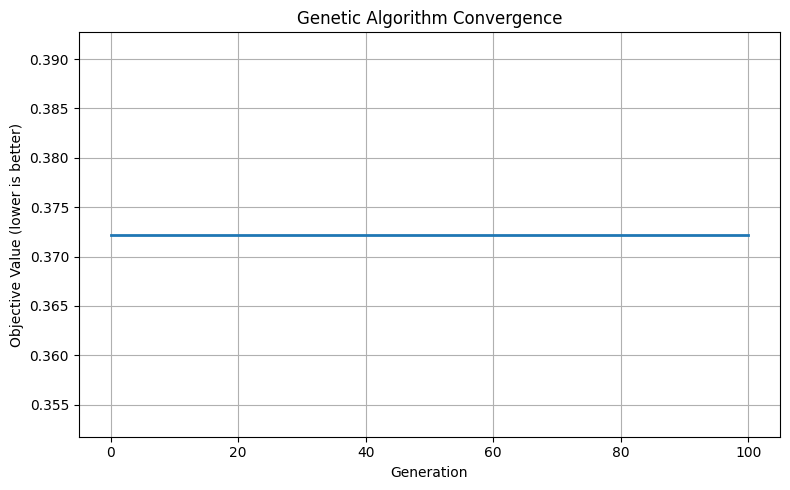

In [ ]:
try:
  import pygad
except ImportError:
  !pip install pygad
  import pygad

import random

print(f"Risk profile is {user_risk_preference}")

# -------------------------------
# Problem Data and Parameters
# -------------------------------
# Assume mu_preds_arima is provided; for example:
# mu_preds_arima = [("118935", 0.001), ("140453", 0.001), ("119597", 0.0011), ("119659", 0.0011), ("119160", 0.0007), ...]
mu_preds_arima = [
    (scheme, pred)
    for scheme, pred in mu_preds
    if pred is not None and np.isfinite(pred)
]

scheme_codes = [scheme for scheme, _ in mu_preds_arima]
# print(len(scheme_codes))
mu_pred = np.array([pred for _, pred in mu_preds_arima])
N = mu_pred.shape[0]
n_select = 5  # Number of funds to select
print(f"Total funds used = {N}")
# Assume filtered_corr_cleaned is a DataFrame with scheme codes as both index and columns.
# For example, it might be a correlation or covariance matrix.
# print("Scheme Codes: ",type(scheme_codes[0]))
filtered_funds = filtered_corr_cleaned.columns.tolist()
# print("Filtered funds: ",type(filtered_funds[0]))
cov_matrix = filtered_corr_cleaned.loc[scheme_codes, scheme_codes].values

R_target=(cluster_df.loc[cluster_df['Risk Level'] == user_risk_preference, 'Avg Return (%)'].values[0])/100
print(f"Minimum Required Target = {R_target}")
PENALTY = 1e10
IND_SIZE = 2 * N

# -------------------------------
# Risk Profile and Lambda Setting
# -------------------------------

if user_risk_preference == "Low Risk":
    lambda1, lambda2 = 0.1, 0.9
elif user_risk_preference == "Moderate Risk":
    lambda1, lambda2 = 0.5, 0.5
elif user_risk_preference == "High Risk":
    lambda1, lambda2 = 0.9, 0.1
else:
    lambda1, lambda2 = 0.5, 0.5  # Default fallback
print(f"lambda1 and lambda2 are {lambda1} and {lambda2} respectively")

# -------------------------------
# Fitness Function
# -------------------------------
def fitness_wrapper(ga_instance, solution, solution_idx):
    # Split solution into selection vector (x) and weights (w)
    x = np.array(solution[:N]).astype(int)
    w = np.array(solution[N:])

    # Constraint 1: Exactly n_select funds must be selected
    if np.sum(x) != n_select:
        return -PENALTY

    # Constraint 2: Weights must sum to 1
    if abs(np.sum(w) - 1) > 0:
        return -PENALTY

    # Constraint 3: If a fund is not selected, its weight must be 0
    for i in range(N):
        if x[i] == 0 and w[i] > 0:
            return -PENALTY

    # Constraint 4: Portfolio expected return must be at least R_target
    expected_return = np.dot(w, mu_pred)
    if expected_return < R_target:
        return -PENALTY

    # Calculate average pairwise correlation among selected funds
    selected_indices = np.where(x == 1)[0]
    if len(selected_indices) < 2:
        avg_corr = 1.0
    else:
        sub_corr = cov_matrix[np.ix_(selected_indices, selected_indices)]
        sum_corr = np.sum(sub_corr) - np.trace(sub_corr)
        num_pairs = len(selected_indices) * (len(selected_indices) - 1)
        avg_corr = sum_corr / num_pairs

    # Calculate portfolio variance
    variance = np.dot(w, np.dot(cov_matrix, w))

    # Combined objective: weighted sum of variance and (optionally) avg_corr.
    # Here, since lambda1 and lambda2 sum the two objectives, lower is better.
    objective_value = lambda1 * avg_corr + lambda2 * variance
    fitness = -objective_value  # Negative because pygad maximizes fitness.
    return fitness

# -------------------------------
# Generate Valid Solution Function
# -------------------------------
def generate_valid_solution():
    solution = np.zeros(IND_SIZE, dtype=float)
    valid_indices = np.arange(N)
    # Select exactly n_select funds
    selected_indices = np.random.choice(valid_indices, size=n_select, replace=False)
    solution[selected_indices] = 1
    # Generate weights only for selected funds using Dirichlet distribution
    temp_weights = np.random.dirichlet(np.ones(n_select), size=1).flatten()
    full_weights = np.zeros(N)
    full_weights[selected_indices] = temp_weights
    solution[N:] = full_weights
    return solution

# -------------------------------
# PyGAD Configuration and Execution
# -------------------------------
population_size = 30
initial_population = [generate_valid_solution() for _ in range(population_size)]

ga_instance = pygad.GA(
    num_generations=10000,
    num_parents_mating=10,
    fitness_func=fitness_wrapper,
    sol_per_pop=population_size,
    num_genes=IND_SIZE,
    initial_population=initial_population,
    gene_type=float,
    gene_space=[0, 1],
    crossover_type="single_point",
    mutation_type="swap",
    mutation_percent_genes=10,
    stop_criteria="saturate_100",
    suppress_warnings=True,
    allow_duplicate_genes=False,
    random_seed=2
)

ga_instance.run()

# Get best solution
best_solution, best_solution_fitness, _ = ga_instance.best_solution()
x_best = best_solution[:N].astype(int)
w_best = best_solution[N:]
selected_funds_final = [scheme_codes[i] for i in np.where(x_best)[0]]

print("Selected funds:", selected_funds_final)
print("Optimal weights:", [f"{w:.4f}"for w in w_best if w > 0])
print("Expected return:", np.dot(w_best, mu_pred))
print("Portfolio variance:", np.dot(w_best, np.dot(cov_matrix, w_best)))
print("Combined Objective Value:", best_solution_fitness)

# 1. Extract the best fitness at each generation (PyGAD stores maximized fitness)
fitness_history = ga_instance.best_solutions_fitness  # Array of best fitness values
# 2. Convert fitness back to objective value (remember fitness = -objective)
objective_history = [-f for f in fitness_history]
plt.figure(figsize=(8, 5))
plt.plot(objective_history, linewidth=2)
plt.title("Genetic Algorithm Convergence")
plt.xlabel("Generation")
plt.ylabel("Objective Value (lower is better)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Result Visualization

In [ ]:
def visualize_portfolio_allocation(df, selected_funds, weights, title_suffix=""):
    """
    Visualizes portfolio allocation for selected funds.

    Parameters:
    - df: DataFrame containing fund metadata with columns ['Scheme Code', 'Funds', 'Fund Manager', 'Category',
           'Fund Type', 'Cluster']
    - selected_funds: list of Scheme Code integers
    - weights: list of floats corresponding to portfolio weights for selected_funds
    - title_suffix: optional string to append to the chart titles
    """
    # Filter and prepare the portfolio DataFrame
    portfolio_df = df[df['Scheme Code'].isin(selected_funds)].copy()
    portfolio_df = portfolio_df.drop_duplicates(subset='Scheme Code')
    portfolio_df['Weight'] = weights

    # Display final table
    display_df = portfolio_df[['Funds', 'Fund Manager', 'Category', 'Fund Type', 'Weight']]
    print("Final Portfolio Composition:\n")
    display_df.reset_index(drop=True, inplace=True)
    display(display_df)

    # Pie Chart 1: Fund Allocation
    plt.figure(figsize=(8, 6))
    plt.pie(portfolio_df['Weight'], labels=portfolio_df['Funds'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Portfolio Allocation by Fund {title_suffix}')
    plt.axis('equal')
    plt.show()

    # # Pie Chart 2: Fund Type Split
    # fund_type_split = portfolio_df.groupby('Fund Type')['Weight'].sum()
    # plt.figure(figsize=(8, 6))
    # plt.pie(fund_type_split, labels=fund_type_split.index, autopct='%1.1f%%', startangle=140,
    #         colors=sns.color_palette('pastel'))
    # plt.title(f'Portfolio Split by Fund Type {title_suffix}')
    # plt.axis('equal')
    # plt.show()

    # Pie Chart 2: Equity vs Debt based on Cluster
    cluster_split = portfolio_df.groupby('Cluster')['Weight'].sum()
    equity_weight = cluster_split.get(1, 0)
    debt_weight = cluster_split.get(0, 0)
    plt.figure(figsize=(8, 6))
    labels = ['Equity (Cluster 1)', 'Debt (Cluster 0)']
    sizes = [equity_weight, debt_weight]
    explode = (0.05, 0.05)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=['#4c72b0', '#c44e52'])
    plt.title(f'Equity vs Debt Allocation {title_suffix}')
    plt.axis('equal')
    plt.show()


High Risk

Final Portfolio Composition:



,Funds,Fund Manager,Category,Fund Type,Weight
0,DSP Small Cap Fund-Reg(G),Vinit Sambre,EQ-SML,Open Ended,0.0554
1,Nippon India Retirement Fund-Wealth Creation(G),Pranay Sinha,HY-SOL,Open Ended,0.0475
2,Quant Large & Mid Cap Fund(G),Ankit Pande,EQ-L&M,Open Ended,0.3812
3,SBI Magnum Midcap Fund-Reg(G),Bhavin Vithlani,EQ-MID,Open Ended,0.2569
4,SBI PSU Fund-Reg(G),Rohit Shimpi,EQ-THEM,Open Ended,0.2589


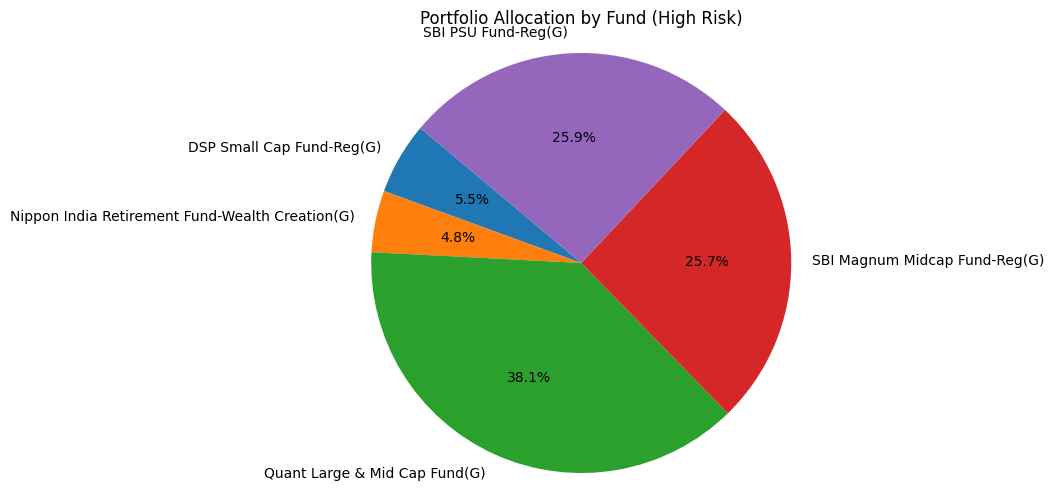

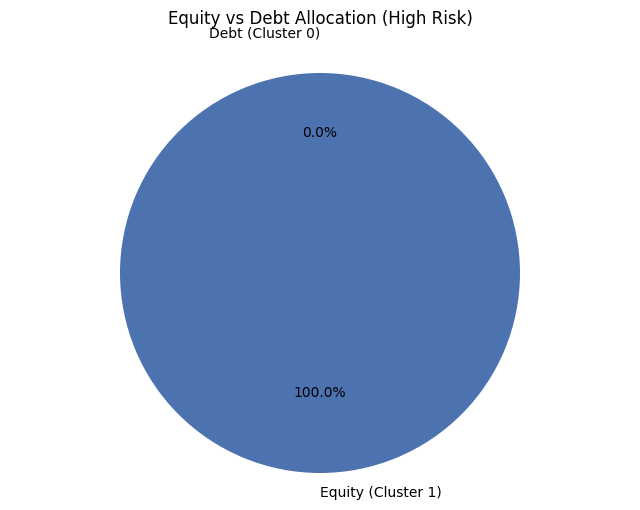

In [ ]:
selected_funds_final = [119716, 119212, 119732, 119350, 133568]
w_best_final = [0.0554, 0.0475, 0.3812, 0.2569, 0.2589]
visualize_portfolio_allocation(df1, selected_funds_final, w_best_final, title_suffix="(High Risk)")

Moderate Risk

Final Portfolio Composition:



,Funds,Fund Manager,Category,Fund Type,Weight
0,Axis Gold ETF,Aditya Pagaria,GOLD-ETF,Open Ended,0.0686
1,DSP Credit Risk Fund-Reg(G),Vivekanand Ramakrishnan,DT-CR,Open Ended,0.4448
2,Invesco India Contra Fund(G),Taher Badshah,EQ-VAL,Open Ended,0.1112
3,Invesco India Financial Services Fund(G),Hiten Jain,EQ-FIN,Open Ended,0.1450
4,Quantum Gold Fund ETF,Chirag Mehta,GOLD-ETF,Open Ended,0.2304


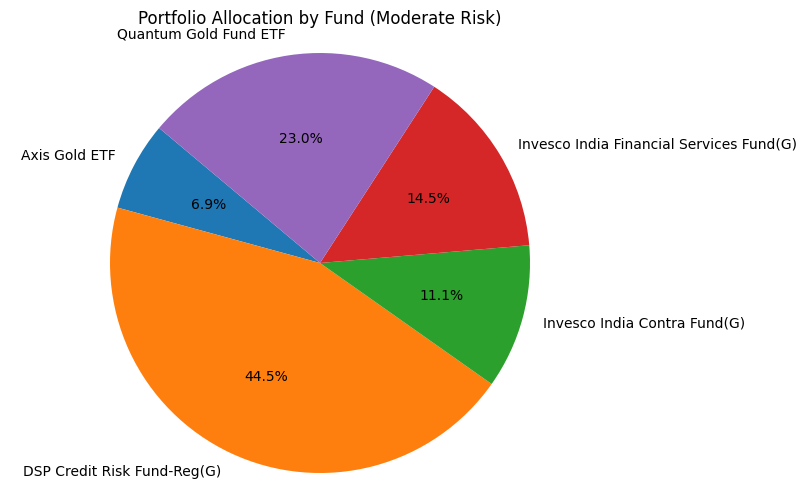

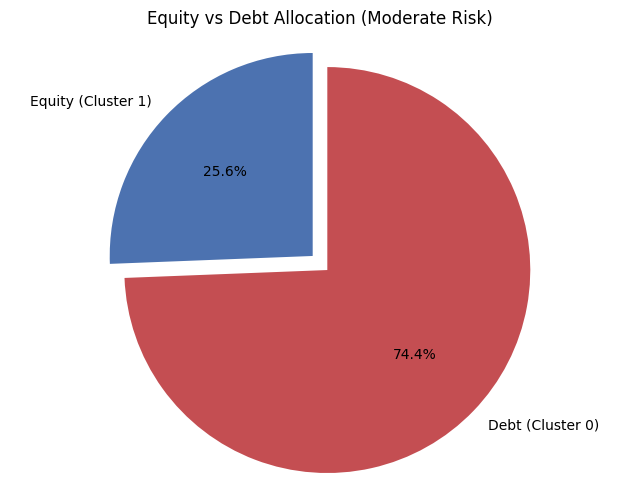

In [ ]:
selected_funds_final = [120348, 120385, 120473, 119082, 115132]
w_best_final = [0.0686, 0.4448, 0.1112, 0.1450, 0.2304]
visualize_portfolio_allocation(df1, selected_funds_final, w_best_final, title_suffix="(Moderate Risk)")

Final Portfolio Composition:



,Funds,Fund Manager,Category,Fund Type,Weight
0,HSBC Banking and PSU Debt Fund-Reg(G),Mahesh Chhabria,DT-B&PSU,Open Ended,0.2278
1,Invesco India Arbitrage Fund(G),Deepak Gupta,HY-ARB,Open Ended,0.0319
2,JM Arbitrage Fund(G),Asit Bhandarkar,HY-ARB,Open Ended,0.2906
3,Kotak Global Emerging Mkt Fund(G),Arjun Khanna,FOF-OVR,Open Ended,0.1329
4,SBI Liquid Fund-Reg(G),R. Arun,DT-LIQ,Open Ended,0.3167


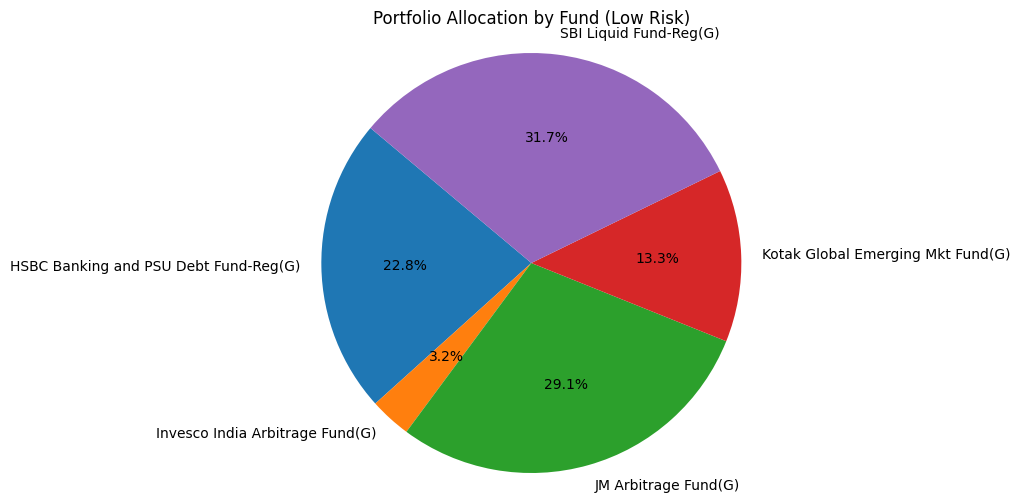

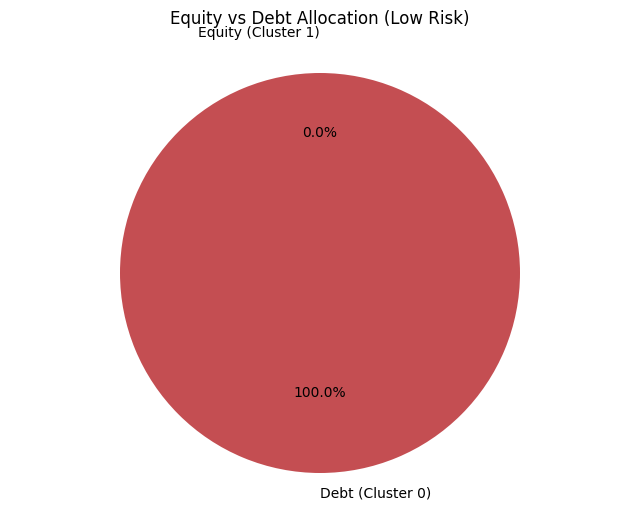

In [ ]:
selected_funds_final = [120401, 120482, 119625, 119779, 119800]
w_best_final = [0.2278, 0.0319, 0.2906, 0.1329, 0.3167]
visualize_portfolio_allocation(df1, selected_funds_final, w_best_final, title_suffix="(Low Risk)")